In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file_path = r'C:\Users\rashm\OneDrive\Documents\Numpy Ninja\Python Hackathon\OrganDonor_Consolidated.xlsx'
df = pd.ExcelFile(file_path)

In [25]:
# Load the excelsheet
donor_details = df.parse('DonorDetails')
outcomes = df.parse('Outcomes')
referral_details = df.parse('ReferralDetails')
hosp_details = df.parse('OPO_HospDetails')
yearly_outcomes = df.parse('Yearly_Outcomes')

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows where MechanismOfDeath is 'stroke'
stroke_data = outcomes[outcomes['mechanism_of_death'] == 'Stroke']

# Group by 'Year' and sum 'OrganProcurements'
stroke_procurements = stroke_data.groupby('Year')['OrganProcurements'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=stroke_procurements, x='Year', y='OrganProcurements', palette='Blues_d')

# Add labels and title
plt.title('Organ Procurements by Year (mechanism_of_death: Stroke)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Organ Procurements', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight the year with the highest procurements
max_year = stroke_procurements.loc[stroke_procurements['OrganProcurements'].idxmax()]
plt.text(max_year['Year'], max_year['OrganProcurements'] + 1,
         f"Max: {int(max_year['OrganProcurements'])}", 
         color='red', ha='center', fontsize=12)

# Show the chart
plt.show()


KeyError: 'mechanism_of_death'

In [53]:
import pandas as pd

# Merge outcomes and patient_details by PatientID
merged_data_1 = pd.merge(donor_details, outcomes, on='PatientID', how='inner')

merged_data = pd.merge(merged_data_1, referral_details, on='PatientID', how='inner')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge patient_details and outcomes by PatientID
merged_data = pd.merge(donor_details, outcomes, on='PatientID', how='inner')

# Filter rows where cause of Death is 'stroke'
stroke_data = merged_data[merged_data['mechanism_Of_death'] == 'Stroke']

# Group by 'Year' and calculate the total number of organ procurements
stroke_procurements = stroke_data.groupby('Year')['OrganProcurements'].sum().reset_index()

# Find the year with the highest procurements
max_year = stroke_procurements.loc[stroke_procurements['OrganProcurements'].idxmax()]
print(f"The year {max_year['Year']} recorded the highest number of organ procurements "
      f"({max_year['OrganProcurements']}) from patients who died due to stroke.")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=stroke_procurements, x='Year', y='OrganProcurements', palette='Blues_d')

# Add labels and title
plt.title('Organ Procurements by Year (Mechanism of Death: Stroke)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Organ Procurements', fontsize=14)
plt.xticks(rotation=45)

# Highlight the year with the highest procurements
plt.text(max_year['Year'], max_year['OrganProcurements'] + 1,
         f"Max: {int(max_year['OrganProcurements'])}", 
         color='red', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


KeyError: 'mechanism_Of_death'

In [56]:
# Filter rows where cause of Death is 'stroke'
stroke_data = merged_data[merged_data['mechanism_of_death'] == 'Stroke']

# Group by 'Year' and calculate the total number of organ procurements
stroke_procurements = stroke_data.groupby('Referral_Year')['PatientID'].sum().reset_index()

print(stroke_procurements)


   Referral_Year                                          PatientID
0           2015  OPO1_P876499OPO1_P503214OPO1_P427408OPO1_P1347...
1           2016  OPO1_P201117OPO1_P60244OPO1_P423807OPO1_P96597...
2           2017  OPO1_P800104OPO1_P487599OPO1_P207580OPO1_P7826...
3           2018  OPO1_P772648OPO1_P75133OPO1_P855136OPO1_P26586...
4           2019  OPO1_P371149OPO1_P547282OPO1_P583440OPO1_P1827...
5           2020  OPO1_P938345OPO1_P759874OPO1_P412179OPO1_P9502...
6           2021  OPO1_P435463OPO1_P918090OPO1_P465526OPO1_P4866...


In [ ]:
# Filter rows where cause of Death is 'stroke'
stroke_data = merged_data[merged_data['mechanism_of_death'] == 'Stroke']


# Group by 'Referral_Year' and calculate the count of unique 'PatientID'
stroke_procurements = stroke_data.groupby('Referral_Year')['PatientID'].nunique().reset_index()


# Rename the column to indicate it is the count of patients
stroke_procurements.columns = ['Referral_Year', 'PatientCount']

print(stroke_procurements)

   Referral_Year  PatientCount
0           2015           336
1           2016           322
2           2017           330
3           2018           375
4           2019           473
5           2020           401
6           2021           418


#### Q 71. Which year recorded the highest number of organ procurements from patients who died due to stroke as the mechanism of death? Display this information using a bar chart.

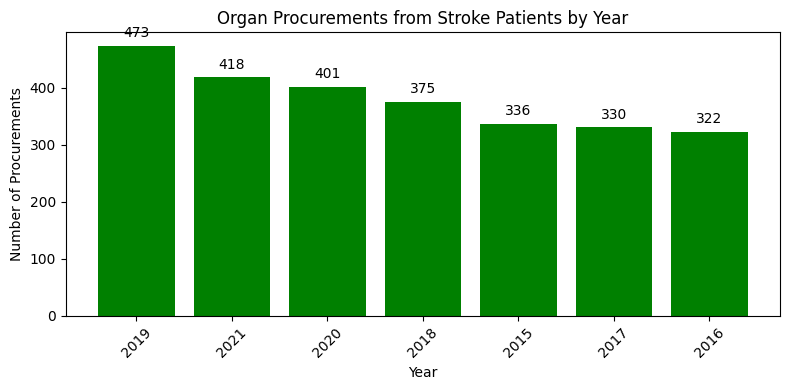

In [73]:

# Lets start with merging data: outcomes and patient_details and referral_details
merged_data_1 = pd.merge(donor_details, outcomes, on='PatientID', how='inner')

merged_data = pd.merge(merged_data_1, referral_details, on='PatientID', how='inner')

# Filter rows where cause of Death is 'stroke'
stroke_data = merged_data[merged_data['mechanism_of_death'] == 'Stroke']

# Group by 'Referral_Year' and count the number of rows (referrals) for each year
stroke_procurements = stroke_data.groupby('Referral_Year').size().reset_index(name='PatientCount')

stroke_procurements = stroke_procurements.sort_values(by='PatientCount', ascending=False)

# Display the year with the highest number of procurements
highest_year = stroke_procurements.iloc[0]

# Plot the results using a bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(stroke_procurements['Referral_Year'].astype(str), stroke_procurements['PatientCount'], color='green')
# Add annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10,  # Positioning the text
             str(yval), ha='center', va='bottom', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Number of Procurements')
plt.title('Organ Procurements from Stroke Patients by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()